<a href="https://colab.research.google.com/github/cruzmarcela02/ciencia-de-datos/blob/main/TP2-competitive/colab-modelos/modelo_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRO


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')
sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Cargar archivos


In [ ]:
# 1. https://drive.google.com/file/d/16lG3-nbA8kzsgU9FdRdv_n0uFC28Xr-H/view?usp=drive_link
id='16lG3-nbA8kzsgU9FdRdv_n0uFC28Xr-H'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('item_categories.csv')

In [ ]:
# 2. https://drive.google.com/file/d/1c7mcCGabwq1dM5s82yL0ZaPU6Dzr_489/view?usp=drive_link
id='1c7mcCGabwq1dM5s82yL0ZaPU6Dzr_489'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('items.csv')

In [ ]:
# 3. https://drive.google.com/file/d/1dYfyImjwbSLzS6wu476oc6RTr6x-QU7Y/view?usp=drive_link
id='1dYfyImjwbSLzS6wu476oc6RTr6x-QU7Y'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('sales_train.csv')

In [ ]:
# 4. https://drive.google.com/file/d/1gCwL27K8S9T3jDFYzPlYs141gG-KNgE3/view?usp=drive_link
id='1gCwL27K8S9T3jDFYzPlYs141gG-KNgE3'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('sample_submission.csv')

In [ ]:
# 5. https://drive.google.com/file/d/1x2qB98Dz10JJLXMY2viNkDtIgMljW4uv/view?usp=drive_link
id='1x2qB98Dz10JJLXMY2viNkDtIgMljW4uv'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('shops.csv')

In [ ]:
# 6. https://drive.google.com/file/d/19BxloYpVZOT-C2Y2vZbrVZdQ9d0u3UNu/view?usp=drive_link
id='19BxloYpVZOT-C2Y2vZbrVZdQ9d0u3UNu'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('test.csv')

## Abrimos archivos

In [ ]:
categories_id = pd.read_csv('item_categories.csv')
categories_id

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [ ]:
categories_id.item_category_id.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

In [ ]:
len(categories_id.item_category_name.unique())

84

In [ ]:
items = pd.read_csv('items.csv')
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [ ]:
sales_train = pd.read_csv('sales_train.csv')
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.00
1,03.01.2013,0,25,2552,899.00,1.00
2,05.01.2013,0,25,2552,899.00,-1.00
3,06.01.2013,0,25,2554,"1,709.05",1.00
4,15.01.2013,0,25,2555,"1,099.00",1.00
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.00
2935845,09.10.2015,33,25,7460,299.00,1.00
2935846,14.10.2015,33,25,7459,349.00,1.00
2935847,22.10.2015,33,25,7440,299.00,1.00


In [ ]:
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub

,ID,item_cnt_month
0,0,0.50
1,1,0.50
2,2,0.50
3,3,0.50
4,4,0.50
...,...,...
214195,214195,0.50
214196,214196,0.50
214197,214197,0.50
214198,214198,0.50


In [ ]:
sample_sub.item_cnt_month.value_counts()

item_cnt_month
0.50    214200
Name: count, dtype: int64

In [ ]:
shops = pd.read_csv('shops.csv')
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [ ]:
test = pd.read_csv('test.csv')
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [ ]:
test.shop_id.unique()

array([ 5,  4,  6,  3,  2,  7, 10, 12, 28, 31, 26, 25, 22, 24, 21, 15, 16,
       18, 14, 19, 42, 50, 49, 53, 52, 47, 48, 57, 58, 59, 55, 56, 36, 37,
       35, 38, 34, 46, 41, 44, 39, 45])

In [ ]:
len(test.item_id.unique())

5100

# Armamos el archivo



In [ ]:
sales_train = sales_train.merge(items, on='item_id', how='left')
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.00,1.00,ЯВЛЕНИЕ 2012 (BD),37
1,03.01.2013,0,25,2552,899.00,1.00,DEEP PURPLE The House Of Blue Light LP,58
2,05.01.2013,0,25,2552,899.00,-1.00,DEEP PURPLE The House Of Blue Light LP,58
3,06.01.2013,0,25,2554,"1,709.05",1.00,DEEP PURPLE Who Do You Think We Are LP,58
4,15.01.2013,0,25,2555,"1,099.00",1.00,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56
...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.00,V/A Nu Jazz Selection (digipack),55
2935845,09.10.2015,33,25,7460,299.00,1.00,V/A The Golden Jazz Collection 1 2CD,55
2935846,14.10.2015,33,25,7459,349.00,1.00,V/A The Best Of The 3 Tenors,55
2935847,22.10.2015,33,25,7440,299.00,1.00,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57


In [ ]:
sales_train = sales_train.merge(shops, on='shop_id', how='left')
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name
0,02.01.2013,0,59,22154,999.00,1.00,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.00,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.00,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,"1,709.05",1.00,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,"1,099.00",1.00,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум"""
...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.00,V/A Nu Jazz Selection (digipack),55,"Москва ТРК ""Атриум"""
2935845,09.10.2015,33,25,7460,299.00,1.00,V/A The Golden Jazz Collection 1 2CD,55,"Москва ТРК ""Атриум"""
2935846,14.10.2015,33,25,7459,349.00,1.00,V/A The Best Of The 3 Tenors,55,"Москва ТРК ""Атриум"""
2935847,22.10.2015,33,25,7440,299.00,1.00,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,"Москва ТРК ""Атриум"""


In [ ]:
sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y')
sales_train['year'] = sales_train['date'].dt.year
sales_train['month'] = sales_train['date'].dt.month
sales_train['day'] = sales_train['date'].dt.day
sales_train['day_of_week'] = sales_train['date'].dt.dayofweek
sales_train.head() ## divido por año mes dia y dia de la semana

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,year,month,day,day_of_week
0,2013-01-02,0,59,22154,999.00,1.00,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",2013,1,2,2
1,2013-01-03,0,25,2552,899.00,1.00,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",2013,1,3,3
2,2013-01-05,0,25,2552,899.00,-1.00,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",2013,1,5,5
3,2013-01-06,0,25,2554,"1,709.05",1.00,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",2013,1,6,6
4,2013-01-15,0,25,2555,"1,099.00",1.00,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",2013,1,15,1


In [ ]:
sales_train.describe()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,day,day_of_week
count,2935849,"2,935,849.00","2,935,849.00","2,935,849.00","2,935,849.00","2,935,849.00","2,935,849.00","2,935,849.00","2,935,849.00","2,935,849.00","2,935,849.00"
mean,2014-04-03 05:44:34.970681344,14.57,33.00,"10,197.23",890.85,1.24,40.00,"2,013.78",6.25,15.85,3.37
min,2013-01-01 00:00:00,0.00,0.00,0.00,-1.00,-22.00,0.00,"2,013.00",1.00,1.00,0.00
25%,2013-08-01 00:00:00,7.00,22.00,"4,476.00",249.00,1.00,28.00,"2,013.00",3.00,8.00,2.00
50%,2014-03-04 00:00:00,14.00,31.00,"9,343.00",399.00,1.00,40.00,"2,014.00",6.00,16.00,4.00
75%,2014-12-05 00:00:00,23.00,47.00,"15,684.00",999.00,1.00,55.00,"2,014.00",9.00,24.00,5.00
max,2015-10-31 00:00:00,33.00,59.00,"22,169.00","307,980.00","2,169.00",83.00,"2,015.00",12.00,31.00,6.00
std,NaN,9.42,16.23,"6,324.30","1,729.80",2.62,17.10,0.77,3.54,8.92,2.00


In [ ]:
sales_train = sales_train.loc[sales_train['item_cnt_day'] > 0] #saco las cantidades negativas
sales_train = sales_train.loc[sales_train['item_price'] > 0] #saco los precios negativos
sales_train = sales_train.loc[~sales_train['date_block_num'].isnull()]
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,year,month,day,day_of_week
0,2013-01-02,0,59,22154,999.00,1.00,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",2013,1,2,2
1,2013-01-03,0,25,2552,899.00,1.00,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",2013,1,3,3
3,2013-01-06,0,25,2554,"1,709.05",1.00,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",2013,1,6,6
4,2013-01-15,0,25,2555,"1,099.00",1.00,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",2013,1,15,1
5,2013-01-10,0,25,2564,349.00,1.00,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,"Москва ТРК ""Атриум""",2013,1,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.00,V/A Nu Jazz Selection (digipack),55,"Москва ТРК ""Атриум""",2015,10,10,5
2935845,2015-10-09,33,25,7460,299.00,1.00,V/A The Golden Jazz Collection 1 2CD,55,"Москва ТРК ""Атриум""",2015,10,9,4
2935846,2015-10-14,33,25,7459,349.00,1.00,V/A The Best Of The 3 Tenors,55,"Москва ТРК ""Атриум""",2015,10,14,2
2935847,2015-10-22,33,25,7440,299.00,1.00,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,"Москва ТРК ""Атриум""",2015,10,22,3


In [ ]:
sales_train['mean_category_shop'] = sales_train.groupby(['shop_id', 'item_category_id'])['item_cnt_day'].transform('mean')
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,year,month,day,day_of_week,mean_category_shop
0,2013-01-02,0,59,22154,999.00,1.00,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",2013,1,2,2,1.02
1,2013-01-03,0,25,2552,899.00,1.00,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",2013,1,3,3,1.01
3,2013-01-06,0,25,2554,"1,709.05",1.00,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",2013,1,6,6,1.01
4,2013-01-15,0,25,2555,"1,099.00",1.00,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",2013,1,15,1,1.09
5,2013-01-10,0,25,2564,349.00,1.00,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,"Москва ТРК ""Атриум""",2013,1,10,3,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.00,V/A Nu Jazz Selection (digipack),55,"Москва ТРК ""Атриум""",2015,10,10,5,1.07
2935845,2015-10-09,33,25,7460,299.00,1.00,V/A The Golden Jazz Collection 1 2CD,55,"Москва ТРК ""Атриум""",2015,10,9,4,1.07
2935846,2015-10-14,33,25,7459,349.00,1.00,V/A The Best Of The 3 Tenors,55,"Москва ТРК ""Атриум""",2015,10,14,2,1.07
2935847,2015-10-22,33,25,7440,299.00,1.00,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,"Москва ТРК ""Атриум""",2015,10,22,3,1.01


In [ ]:
sales_train['mean_items_shop'] = sales_train.groupby(['shop_id', 'item_id'])['item_cnt_day'].transform('mean')
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,year,month,day,day_of_week,mean_category_shop,mean_items_shop
0,2013-01-02,0,59,22154,999.00,1.00,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",2013,1,2,2,1.02,1.00
1,2013-01-03,0,25,2552,899.00,1.00,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",2013,1,3,3,1.01,1.00
3,2013-01-06,0,25,2554,"1,709.05",1.00,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",2013,1,6,6,1.01,1.00
4,2013-01-15,0,25,2555,"1,099.00",1.00,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",2013,1,15,1,1.09,1.00
5,2013-01-10,0,25,2564,349.00,1.00,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,"Москва ТРК ""Атриум""",2013,1,10,3,1.01,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.00,V/A Nu Jazz Selection (digipack),55,"Москва ТРК ""Атриум""",2015,10,10,5,1.07,1.00
2935845,2015-10-09,33,25,7460,299.00,1.00,V/A The Golden Jazz Collection 1 2CD,55,"Москва ТРК ""Атриум""",2015,10,9,4,1.07,1.00
2935846,2015-10-14,33,25,7459,349.00,1.00,V/A The Best Of The 3 Tenors,55,"Москва ТРК ""Атриум""",2015,10,14,2,1.07,1.04
2935847,2015-10-22,33,25,7440,299.00,1.00,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,"Москва ТРК ""Атриум""",2015,10,22,3,1.01,1.00


# XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Ordenamos por fechas
sales_train.sort_values(by='date')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,year,month,day,day_of_week,mean_category_shop,mean_items_shop
28804,2013-01-01,0,27,2678,999.00,1.00,Dance Central 2 - MSX Xbox 360 Russian Russia ...,23,"Москва ТЦ ""МЕГА Белая Дача II""",2013,1,1,1,1.28,1.11
93016,2013-01-01,0,42,13831,398.36,1.00,ЛЕДИ,40,"СПб ТК ""Невский Центр""",2013,1,1,1,1.11,1.00
54261,2013-01-01,0,8,18450,199.00,1.00,СБ. Союз 51,55,"Воронеж ТРЦ Сити-Парк ""Град""",2013,1,1,1,1.01,1.00
100504,2013-01-01,0,51,18201,219.00,1.00,СБ. 25 лучших русских романсов 2CD,55,"Тюмень ТЦ ""Зеленый Берег""",2013,1,1,1,1.01,1.00
114730,2013-01-01,0,46,5272,599.00,2.00,Need for Speed: Most Wanted (a Criterion Game)...,30,"Сергиев Посад ТЦ ""7Я""",2013,1,1,1,1.28,1.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897253,2015-10-31,33,55,6089,399.00,1.00,"Rayman Legends. Русская версия.[PC, Цифровая в...",31,Цифровой склад 1С-Онлайн,2015,10,31,5,1.70,1.12
2932051,2015-10-31,33,21,4261,299.00,1.00,"King's Bounty: Темная сторона [PC, Jewel, русс...",30,"Москва МТРЦ ""Афи Молл""",2015,10,31,5,1.26,1.05
2899396,2015-10-31,33,58,21671,399.00,1.00,ЧЕРЕПАШКИ-НИНДЗЯ Сезон 2 Коллекция мультфиль...,40,"Якутск ТЦ ""Центральный""",2015,10,31,5,1.09,1.00
2913799,2015-10-31,33,19,7863,"1,299.00",1.00,World of Warcraft: Warlords of Draenor (дополн...,28,"Курск ТЦ ""Пушкинский""",2015,10,31,5,1.34,1.44


In [ ]:
# Definimos nuestros features y nuesto target
X = sales_train[['item_id', 'item_category_id', 'shop_id', 'year', 'month', 'day', 'day_of_week', 'mean_category_shop','mean_items_shop']]
y = sales_train['item_cnt_day']

In [ ]:
# Subdividimos en train 80%, test 20%
train_size = int(0.8 * len(X))

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_test = X.iloc[train_size:]
y_test = y.iloc[train_size:]

In [ ]:
xg_reg = XGBRegressor(objective ='reg:squarederror',
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
preds = xg_reg.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 4.044363


Agregamos mas arboles

In [ ]:
xg_reg_b = XGBRegressor(objective ='reg:squarederror',
                colsample_bytree = 0.3, learning_rate = 0.15,
                max_depth = 6, alpha = 10, n_estimators = 25, subsample=0.9) #25
xg_reg_b.fit(X_train,y_train)
preds = xg_reg_b.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 3.973083


In [ ]:
import xgboost as xgb

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

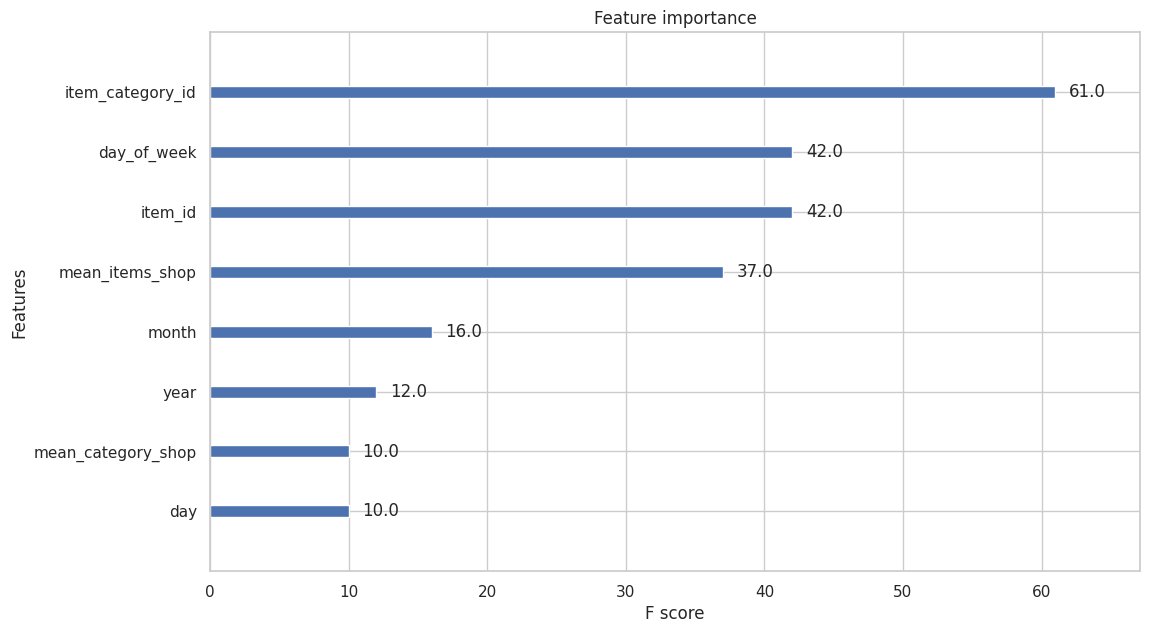

In [ ]:
plt.rcParams['figure.figsize'] = [12, 7]
xgb.plot_importance(xg_reg)

## Convertimos los datos a DMatrix

In [ ]:
dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(X_test)

In [ ]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,
          'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=dtrain, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123)

In [ ]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2.60,0.24,2.56,0.48
1,2.59,0.24,2.55,0.48
2,2.55,0.25,2.51,0.49
3,2.54,0.25,2.51,0.49
4,2.54,0.25,2.50,0.49


In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

49                   2.31
Name: test-rmse-mean, dtype: float64


In [ ]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.8, 'max_depth': 4,
          'learning_rate': 0.2}

cv_results = xgb.cv(dtrain=dtrain, params=params, nfold=10,
                    num_boost_round=100, early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123)

In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

99                   2.15
Name: test-rmse-mean, dtype: float64
